****
## Feature Selection ###

### 1. Model based feature selection #####

In [1]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**[Allstate Purchase Prediction Challenge](https://www.kaggle.com/c/allstate-purchase-prediction-challenge/data)**
- 고객이 자동차 보험상품을 구매하기까지의 transaction 기록 
- 각 customer ID 별로 quote history 포함
- 각 customer ID 별 마지막 행이 구매 포인트 (record_type=1)

In [3]:
data = pd.read_csv('Allstate_train.csv')
data.head()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,08:35,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,08:39,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,11:55,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630


In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)   

In [5]:
from sklearn.feature_selection import SelectFromModel # 중요한 피쳐를 선택

from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(), threshold=None) # threshold=None 스스로 알아서 처리
# select 는 전처리기

In [6]:
X_train_fs = select.fit(X_train, y_train).transform(X_train)
# 변수의 중요도가 나온다.
print("X_train.shape: {}, X_train_fs.shape: {}".format(
    X_train.shape, X_train_fs.shape))

X_train.shape: (426, 30), X_train_fs.shape: (426, 7)


C:\Users\1pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


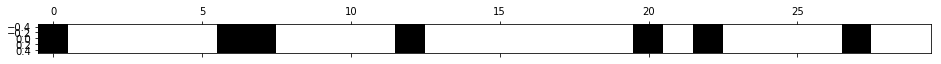

In [7]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap="gray_r")

<font color = "blue">
In **numpy.reshape()**, one shape dimension can be **-1**. In this case, the value is inferred from the length of the array and remaining dimensions.

<font color = "blue">
All built-in colormaps can be reversed by appending **_r**: For instance, **gray_r** is the reverse of **gray**.<br>
See [color map](https://matplotlib.org/2.0.2/api/pyplot_summary.html#matplotlib.pyplot.colormaps).

In [8]:
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train, y_train).score(X_test, y_test)

C:\Users\1pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6293706293706294

In [9]:
X_test_fs = select.transform(X_test)
svm.fit(X_train_fs, y_train).score(X_test_fs, y_test)

C:\Users\1pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9020979020979021

### 2. Univariate feature selection

In [10]:
from sklearn.feature_selection import SelectKBest
# 성능이 높은 변수들을 선택
print(X_train.shape)
X_train_new = SelectKBest(k=5).fit_transform(X_train, y_train) # 5개를 선택해 fit, transform을 동시에 해야함.
X_train_new.shape

(426, 30)


(426, 5)

****
## Feature Generation ###

### Automatic generating polynomial and interaction features
입력값  x 를 다항식으로 변환한다.
$$ x →[1,x,x^2,x^3,⋯] $$

만약 열의 갯수가 두 개이고 2차 다항식으로 변환하는 경우에는 다음처럼 변환한다.
$$ [x_1,x_2]→[1,x_1,x_2,x_1^2,x_1x_2,x_2^2] $$

다음과 같은 파라미터를 가진다.
- degree : 차수
- interaction_only: interaction 항 생성 여부
- include_bias : 상수항 생성 여부

In [11]:
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(1,7).reshape(3, 2)
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [12]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  5.,  6., 25., 30., 36.]])

In [13]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  1.,  2.,  2.],
       [ 1.,  3.,  4., 12.],
       [ 1.,  5.,  6., 30.]])

In [14]:
print(X_train.shape)

poly = PolynomialFeatures(2)
poly.fit_transform(X_train).shape

(426, 30)


(426, 496)

<font color='blue'>
#### 기타 [Discretization](http://scikit-learn.org/stable/modules/preprocessing.html#discretization)과 [Dimensionality reduction](http://scikit-learn.org/stable/modules/unsupervised_reduction.html) 등도 Feature Engineering에서 자주 사용되는 방법이다.

# ML Workflow Optimization
<font color=#CC3D3D>
## Pipeline: chaining estimators   
</font>
- Pipeline can be used to chain multiple estimators into one.
- Pipeline serves two purposes:
  - Convenience and encapsulation
  - Joint parameter selection
- All estimators in a pipeline, except the last one, must be transformers. 
  - The last estimator may be any type (transformer, classifier, etc.)
- Training and prediction procedure of the pipeline
<br>
<img align="left" src="http://drive.google.com/uc?export=view&id=1pIde-P6d7EnjL3xYo8eE3cWAUEvzV7tS" >

<font color = "#CC3D3D">
### Building Pipelines

In [15]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [16]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

<font color = "blue">
The **Pipeline** is built using a list of **(key, value)** pairs, where the **key** is a string containing the name you want to give this step and **value** is an estimator object:

In [17]:
pipe.fit(X_train, y_train).score(X_test, y_test)

C:\Users\1pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.951048951048951

<font color = "blue">
You only have to call **fit** and **predict** once on your data to fit a whole sequence of estimators

<font color = "#CC3D3D">
### Using Pipelines in Grid-searches

In [25]:
from sklearn.model_selection import GridSearchCV # 최적의 파라미터 검색

In [26]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

<font color = "blue">
Parameters of the estimators in the pipeline shoud be defined using the **estimator__parameter** syntax

In [31]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(
    grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator Pipeline(memory=None,
     steps=[('standardscaler-1', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('standardscaler-2', StandardScaler(copy=True, with_mean=True, with_std=True))]) does not.

<font color = "#CC3D3D">
### Convenient Pipeline creation with *make_pipeline* ##

In [32]:
from sklearn.pipeline import make_pipeline
# standard syntax
pipe_long = Pipeline([("scaler", MinMaxScaler()), 
                      ("svm", SVC(C=100))])
#pipe_long = Pipeline([('pca', PCA(n_components=3))), 
 #                     (('univ_select', SelectKBest(k=10))])
# abbreviated syntax
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

In [33]:
print("Pipeline steps:\n{}".format(pipe_short.steps))

Pipeline steps:
[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]


<font color = "blue">
**Make_pipeline** does not require, and does not permit, naming the estimators. Instead, their names will be set to the **lowercase of their types** automatically.

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(), PCA(n_components=2), 
                     StandardScaler())
print("Pipeline steps:\n{}".format(pipe.steps))

Pipeline steps:
[('standardscaler-1', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('standardscaler-2', StandardScaler(copy=True, with_mean=True, with_std=True))]


<font color = "#CC3D3D">
### Combining Features with *FeatureUnion* ##
<img align='left' src='https://image.slidesharecdn.com/featureengineeringpipelines1-161106200348/95/feature-engineering-pipelines-11-638.jpg?cb=1478462927' width=600 height=400>

In [35]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA # 차원축소 
from sklearn.feature_selection import SelectKBest

In [36]:
# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('univ_select', SelectKBest(k=10)))
feature_union = FeatureUnion(features)
# pca가장 중요한 ** 을 찾아주는 아이
# create pipeline
estimators = []
estimators.append(('features', feature_union))
estimators.append(('scaler', MinMaxScaler()))
estimators.append(("svm", SVC()))
pipe = Pipeline(estimators)

In [40]:
pipe.fit(X_train, y_train).score(X_test, y_test)

C:\Users\1pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.958041958041958

In [41]:
# Do grid search
param_grid = dict(features__pca__n_components=[1, 2, 3],
                  features__univ_select__k=[9, 10, 11],
                  svm__C=[0.1, 1, 10],
                  svm__gamma=[0.1, 1, 10])
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)
print(grid_search.fit(X_train, y_train).score(X_test, y_test))
print(grid_search.best_estimator_)

0.965034965034965
Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=None,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('univ_select', SelectKBest(k=10, score_func=<function f_classif at 0x000000000B20C620>))],
       tra...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])


C:\Users\1pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<font color = "#CC3D3D">
### Implementing Custom Transformers ##

In [42]:
import pandas as pd
import numpy as np

train = pd.read_csv('titanic_train.csv')
train.head()

FileNotFoundError: [Errno 2] File b'titanic_train.csv' does not exist: b'titanic_train.csv'

#### 타이타닉 호 침몰 당시의 승객 명단 데이터

- Survived: 생존 여부 => 0 = No, 1 = Yes
- pclass: 티켓 등급 => 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex: 성별
- Age: 나이
- Sibsp: 함께 탑승한 형제자매, 배우자의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓 번호
- Fare: 운임
- Cabin: 객실 번호
- Embarked: 탑승 항구 => C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
train.info()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,2:], train.Survived, random_state=0)

#### 전처리 방향
feature를 `수치형과 범주형으로 나누어`<sup>1)</sup> 다르게 전처리를 수행한다.
- 수치형의 경우: 결측값을 중앙값으로 대체 -> Standardization
- 범주형의 경우: `결측값이 없는 모든 범주형 feature에 대해 One-Hot-Encoding 수행`<sup>2)</sup>


*<sup>1),2)</sup> scikit-learn에 없는 전처리 기능이기 때문에 Custom Transformer를 만들어야 함.*

In [ ]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# 1)번 Custom Transformer
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.feature_names].values

In [ ]:
# 2)번 Custom Transformer
class CustomLabelBinarizer(BaseEstimator, TransformerMixin):
    def fit(self, X_cat, y=None):
        return self
    def transform(self, X_cat):
        X_cat_df = pd.DataFrame(X_cat, columns=range(X_cat.shape[1]))
        X_onehot_df = pd.get_dummies(X_cat_df, columns=X_cat_df.columns)
        return X_onehot_df.values

In [ ]:
# feature를 수치형과 범주형으로 구분
con = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat = ['Sex', 'Ticket']
#con_idx = [train.columns.get_loc(c) for c in train.columns if c in con]
#cat_idx = [train.columns.get_loc(c) for c in train.columns if c in cat]

In [ ]:
# 수치형 feature에 대한 전처리
con_pipeline = Pipeline([
    ('selector', DataFrameSelector(con)),
    ('imputer', Imputer(strategy='median')),
    ('scaler', StandardScaler()),
])

# 범주형 feature에 대한 전처리
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat)),
    ('encoder', CustomLabelBinarizer()),
])

# 전처리된 수치형과 범주형 feature를 결합
full_pipeline = FeatureUnion([
    ('con_pipeline', con_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [ ]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)